# Sonar Rock vs Mine Prediction (Classification)

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing the dataset

In [2]:
df = pd.read_csv('Copy of sonar data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [8]:
df.groupby(60).mean().reset_index().rename({60: 'Target'}, axis=1)

,Target,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
1,R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### Splitting the dataset into data and target

In [9]:
X = df.drop(60, axis=1)
y = df[60]

### Splitting the data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

### Train our model with training data

#### We have taken Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_preds = lr.predict(X_test)
y_preds

array(['M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R'], dtype=object)

In [13]:
lr.score(X_test, y_test)

0.7619047619047619

In [14]:
lr.score(X_train, y_train)

0.8342245989304813

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

#### Confusion matrix

In [16]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[9, 2],
       [3, 7]])

##### Visualizing the confusion matrix

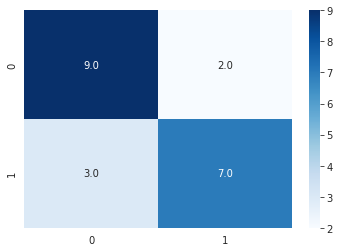

In [17]:
sns.heatmap(cm, cbar=True, annot=True, fmt='.1f', cmap='Blues')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7619047619047619

### Fitting other different model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Decision Tree Classifier

In [21]:
fit_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  ['M' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M'
 'M' 'M' 'R']

The accuracy score:  0.7142857142857143


### 2. Random Forest Classifier

In [22]:
fit_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  ['M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M'
 'R' 'M' 'R']

The accuracy score:  0.7619047619047619


### 3. Support Vector Classifier

In [23]:
fit_model(SVC(), X_train, X_test, y_train, y_test)

The predicted values:
  ['M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M'
 'R' 'M' 'M']

The accuracy score:  0.8095238095238095


### 4. XGB Classifier

In [24]:
fit_model(XGBClassifier(), X_train, X_test, y_train, y_test)

[06:16:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  ['M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M'
 'R' 'M' 'R']

The accuracy score:  0.7619047619047619


### 5. XGBRF Classifier

In [25]:
fit_model(XGBRFClassifier(), X_train, X_test, y_train, y_test)

[06:16:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The predicted values:
  ['M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M'
 'R' 'M' 'R']

The accuracy score:  0.7142857142857143


### 6. K-Nearest Neighbours Classifier

In [26]:
fit_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

The predicted values:
  ['M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M'
 'R' 'M' 'M']

The accuracy score:  0.8095238095238095
